In [105]:
using AlgebraicDynamics
using AlgebraicDynamics.DWDDynam
using AlgebraicDynamics.UWDDynam

using Catlab.CategoricalAlgebra
using Catlab.WiringDiagrams
using Catlab.Graphics
using Catlab.Programs

using OrdinaryDiffEq
using Plots, Plots.PlotMeasures

### p[1]=c, p[2]=beta, p[3]=gamma

In [106]:
dotS(S,x,p,t)=[-S[1]*p[1]*p[2]*x[1]/(S[1]+x[1]+x[2])]
dotI(I,x,p,t)=[x[1]*p[1]*p[2]*I[1]/(x[1]+I[1]+x[2])-I[1]*p[3]]
dotR(R,x,p,t)=[x[1]*p[3]]

dotR (generic function with 1 method)

In [107]:
S = ContinuousMachine{Float64}(2,1,1, dotS,   Sout->Sout)
I = ContinuousMachine{Float64}(2,1,1, dotI,   Iout->Iout)
R = ContinuousMachine{Float64}(1,1,1, dotR,   Rout->Rout)

ContinuousMachine(ℝ^1 × ℝ^1 → ℝ^1)

### define the composition pattern

In [108]:
openSIR_pattern = WiringDiagram([], [])

S_box=add_box!(openSIR_pattern, Box(:S, [:pop, :pop], [:pop]))
I_box=add_box!(openSIR_pattern, Box(:I, [:pop, :pop], [:pop]))
R_box=add_box!(openSIR_pattern, Box(:R, [:pop], [:pop]))

add_wires!(openSIR_pattern, Pair[
    (S_box, 1) => (I_box, 1),
    (R_box, 1) => (I_box, 2),
    (I_box, 1) => (S_box, 1),
    (R_box, 1) => (S_box, 2),
    (I_box, 1) => (R_box, 1)
])

### Visualize the WD of open_SIR model

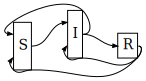

In [99]:
to_graphviz(openSIR_pattern, orientation=LeftToRight)

In [100]:
# compose
openSIR_system = oapply(openSIR_pattern, [S, I, R])


ContinuousMachine(ℝ^3 × ℝ^0 → ℝ^3)

In [101]:
# set parameters
c, β, γ = 5.0, 0.05, 1.0/15.0
params = [c, β, γ]

u0 = [999.0, 1.0, 0.0]
tspan = (0.0, 100.0)

(0.0, 100.0)

In [102]:
# define ODE
prob = ODEProblem(openSIR_system, u0, tspan, params)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: false
timespan: (0.0, 100.0)
u0: [999.0, 1.0, 0.0]

In [103]:
# Solve
sol = solve(prob, FRK65(0))

retcode: Success
Interpolation: 3rd order Hermite
t: 91178-element Array{Float64,1}:
   0.0
   2.467372656653193e-5
   3.676601740090536e-5
   4.862598520770486e-5
   5.9743549764341073e-5
   7.023086751198744e-5
   8.014870336685583e-5
   8.955282788472883e-5
   9.849239907589998e-5
   0.00010701073161374113
   0.00011514618061492083
   0.00012293283877035983
   0.00013040109349621157
   ⋮
  99.9646070809947
  99.96812727057295
  99.97164745954507
  99.9751676476779
  99.9786878352046
  99.982208021892
  99.98572820774014
  99.98924839298213
  99.99276857738485
  99.99628876094829
  99.99980894390558
 100.0
u: 91178-element Array{Array{Float64,1},1}:
 [999.0, 1.0, 0.0]
 [998.999993837709, 1.000004517368474, 1.6449225351184608e-6]
 [998.9999908176391, 1.000006731280262, 2.4510806838493848e-6]
 [998.9999878555858, 1.0000089026619963, 3.2417522433211476e-6]
 [998.9999850789437, 1.0000109381249962, 3.982931320783856e-6]
 [998.9999824597024, 1.0000128582027297, 4.682094827163771e-6]
 [998.

In [104]:
plot(sol, lw=2, title = "Open Population SIR Model", bottom_margin=10mm, left_margin=10mm, label=["S" "I" "R"])
xlabel!("Time")
ylabel!("Population size")